Monte carlo simulation https://www.mikulskibartosz.name/monte-carlo-simulation-in-python/

The one-year lease costs you $400,000, and you cannot cancel early. You wonder whether the annual production level and the savings in maintenance, labor, and raw materials are high enough to justify leasing the machine.

From your human experts, you got the following ranges of variables (note that all ranges have 90% confidence interval and values are normally distributed):

* maintenance savings: 10−20 USD per unit
* labor savings: -2–8 USD per unit
* raw material savings: 3−9 USD per unit
* production level: 15,000–35000 units per year
* annual lease: $400000

the annual savings = (maintenance savings + labor savings + raw material savings) * production level

What do the 90% confidence interval and normal distribution mean? Your experts say that they are 90% sure, that the value will be somewhere between the lower and the upper bound. The mean value is the average between the upper bound and the lower bound, so in case of maintenance savings, mean= $15. Standard deviation is defined as (upper bound — lower bound) / 3.29. 3.29 standard deviations equal to 90% of values in normal distribution.

What are we going to calculate? We want to know what is the probability of failure (annual savings smaller than the cost of the machine).

In [9]:
RANDOM_STATE = 31415
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [12]:
_90_conf_interval = 3.29
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)
number_of_simulations = 1000000
maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)
data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level


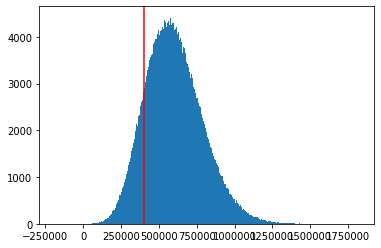

In [16]:
plt.hist(data.total_savings, bins = 1000)
plt.axvline(x = 400000, c = "r")
plt.show()

In [7]:
data[data["total_savings"] < 400000].count()

maintenance_savings_per_unit      140352
labor_savings_per_unit            140352
raw_materials_savings_per_unit    140352
production_level                  140352
total_savings                     140352
dtype: int64

In [8]:
data[data["total_savings"] < 400000].count()["total_savings"] / 1000000

0.140352

In [15]:
data

,maintenance_savings_per_unit,labor_savings_per_unit,raw_materials_savings_per_unit,production_level,total_savings
0,14.517997,1.857530,3.782591,33474.489661,6.747827e+05
1,17.478385,4.811873,5.457200,15799.995493,4.384097e+05
2,16.695497,0.914265,5.136111,30579.252212,6.955518e+05
3,15.479092,1.556595,6.868146,14809.276312,3.539985e+05
4,12.035743,2.227365,4.764726,23881.650460,4.544161e+05
5,15.760637,4.024341,5.063416,22985.768601,5.711595e+05
6,18.558012,3.401819,1.952843,31396.831519,7.507822e+05
7,15.860209,2.863003,5.690181,36771.645538,8.977206e+05
8,17.946823,5.803292,5.320395,22991.547968,6.683760e+05
9,15.153900,0.981886,6.173119,24597.041029,5.487331e+05
